# Cel projektu 
Opracowanie modelu klasyfikacyjnego, który przewiduje kategorię zwierząt w zoo_data na podstawie ich cech.

# Dane wykorzystane w projekcie
Źródło Danych: https://www.kaggle.com/datasets/uciml/zoo_data_data_data_data_data-animal-classification/data

Zestaw danych składa się z dwóch plików: 

'class.csv' (7 rows × 4 columns) - informacje o różnych klasach zwierząt, ich numerach, liczbie gatunków w każdej klasie, typach klas oraz nazwach zwierząt w każdej klasie.

'zoo_data.csv' (101 rows × 18 columns) - dane zawierają różne cechy zwierząt, takie jak obecność włosów, piór, jaj, mleka, zdolność do lotu, bycia drapieżnikiem, obecność zębów, kręgosłupa, oddychania, jadowitości, płetw, liczby nóg, ogona, bycia udomowionym, wielkości oraz typu klasy zwierzęcia.



In [1]:
import pandas as pd

class_data = pd.read_csv('class.csv')
zoo_data = pd.read_csv('zoo.csv')

# Wstępna analiza danych i czyszczenie
Sprawdzenie:
- typu danych
- identyfikacja atrybutów i obserwacji
- spójności
- braki w danych
- wartości odstające

In [2]:
class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [3]:
class_data

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [4]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
zoo_data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
zoo_data.shape

(101, 18)

In [8]:
zoo_data['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [9]:
zoo_data['fins'].unique()

array([0, 1], dtype=int64)

In [10]:
zoo_data.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

## Puste komórki

In [11]:
zoo_data.isna().any()

animal_name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
class_type     False
dtype: bool

In [12]:
zoo_data.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [13]:
class_data.isna().any()
class_data.isna().sum()

Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64

## Duplikaty

In [14]:
zoo_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [15]:
zoo_data.duplicated().sum()

0

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Wizualizacje
## Heatmap
Mapa ciepła przedstawia korelacje między cechami zwierząt w zbiorze danych.

Wysoka korelacja dodatnia: cechy milk i hair wykazują wysoką korelację dodatnią, oznacza to, że zwierzęta posiadające włosy mają również tendencję do produkcji mleka, co jest charakterystyczne dla ssaków.

Wysoka korelacja ujemna: feathers i milk - zwierzęta z piórami (ptaki) nie produkują mleka.

C:\Users\Julia\AppData\Local\Temp\ipykernel_14328\401486767.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(zoo_data.drop(columns=['class_type']).corr(), annot=True, cmap='coolwarm')


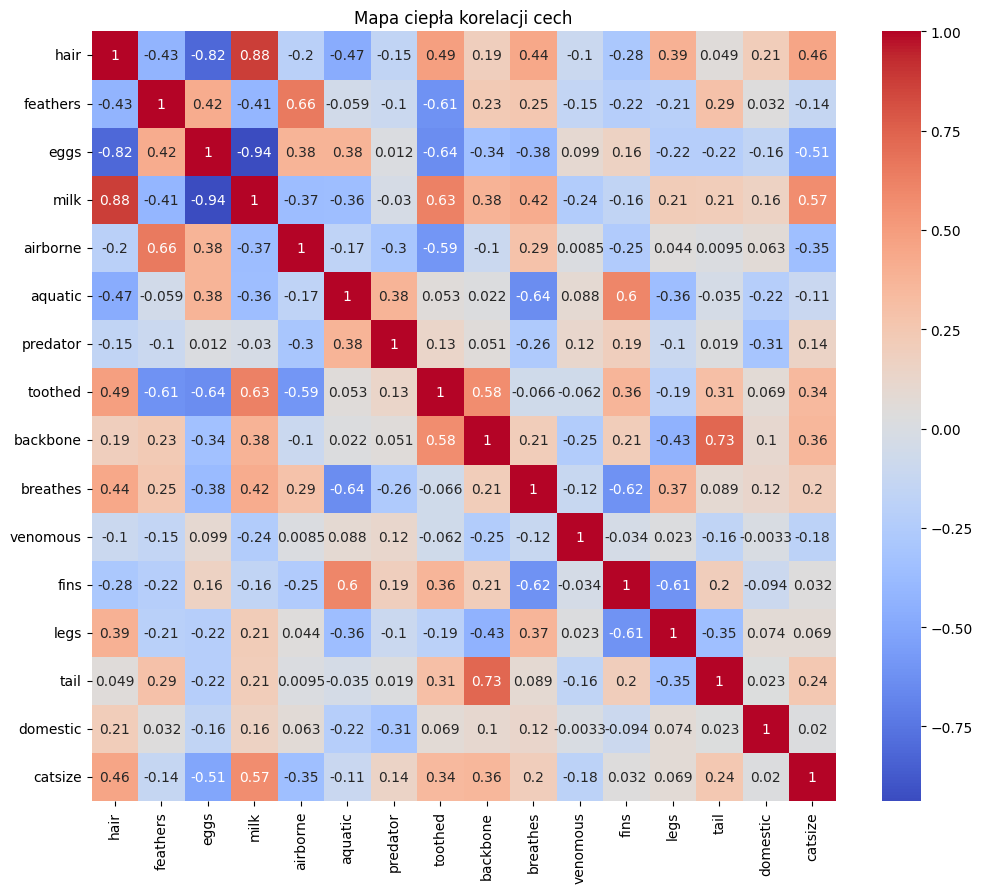

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(zoo_data.drop(columns=['class_type']).corr(), annot=True, cmap='coolwarm')
plt.title('Mapa ciepła korelacji cech')
plt.show()

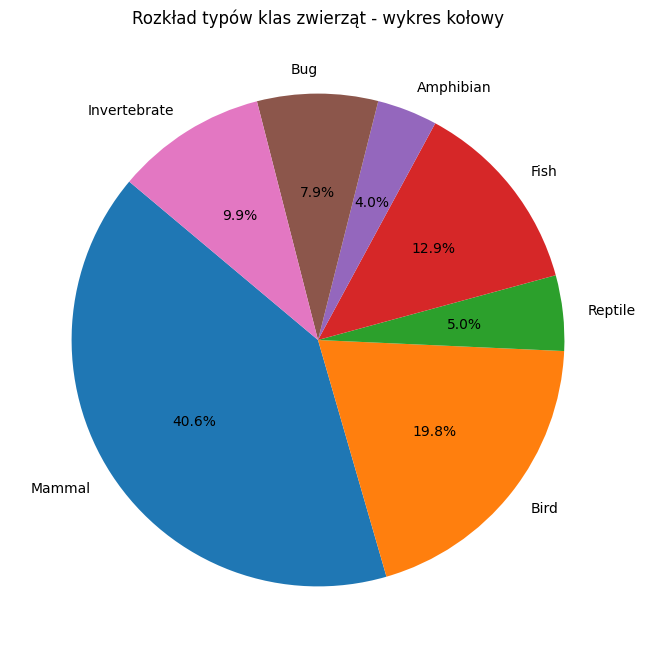

In [18]:
# Wykres kołowy rozkładu typów klas zwierząt
class_counts = zoo_data['class_type'].value_counts().sort_index()
class_labels = class_data.set_index('Class_Number')['Class_Type'][class_counts.index].values
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title('Rozkład typów klas zwierząt - wykres kołowy')
plt.show()

Rozkład liczby zwierząt w poszczególnych klasach pokazuje, które klasy są najbardziej liczne w zbiorze danych. Daje to informacje o zróżnicowaniu gatunkowym w danych.

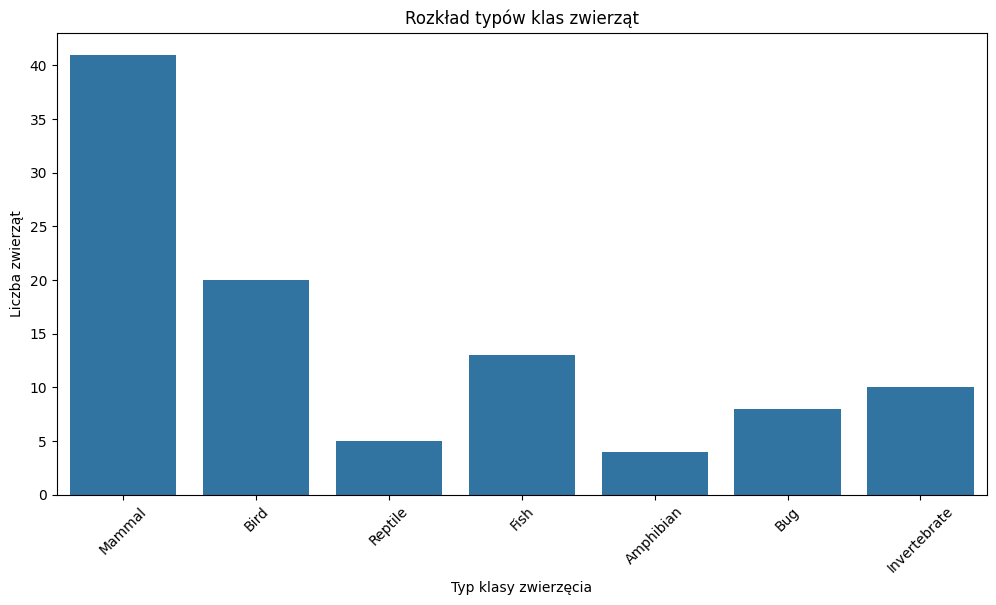

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=zoo_data, x='class_type')
plt.title('Rozkład typów klas zwierząt')
plt.xlabel('Typ klasy zwierzęcia')
plt.ylabel('Liczba zwierząt')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45)
plt.show()

Rozkład liczby nóg u zwierząt pokazuje, jak różnorodne są zwierzęta pod względem ich budowy fizycznej.

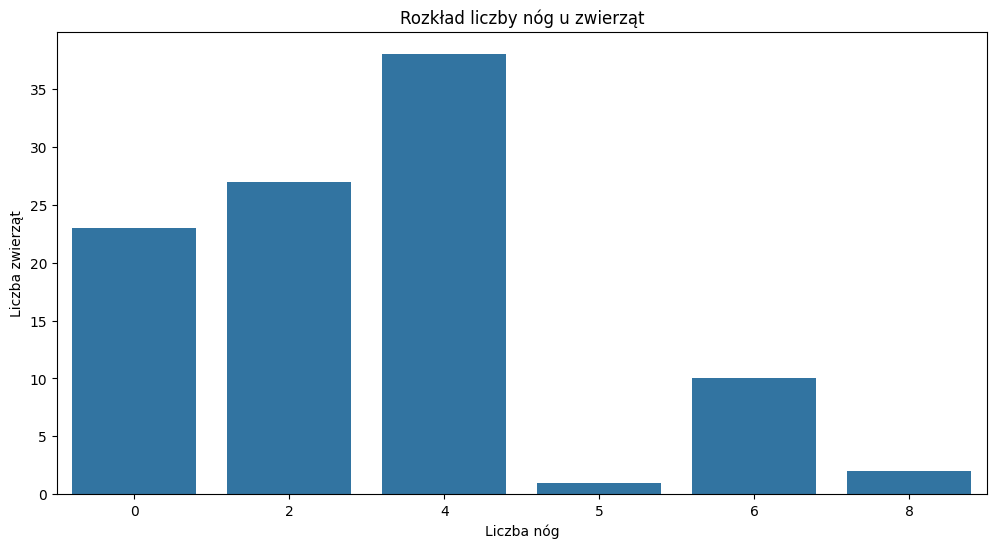

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=zoo_data, x='legs')
plt.title('Rozkład liczby nóg u zwierząt')
plt.xlabel('Liczba nóg')
plt.ylabel('Liczba zwierząt')
plt.show()

Wykresy zliczające ile wystąpień w danym atrybucie jest 0 a ile 1 dla wybranych cech binarnych dają wgląd w charakterystyki zwierząt, takie jak obecność włosów, piór, zdolność do oddychania powietrzem itd.

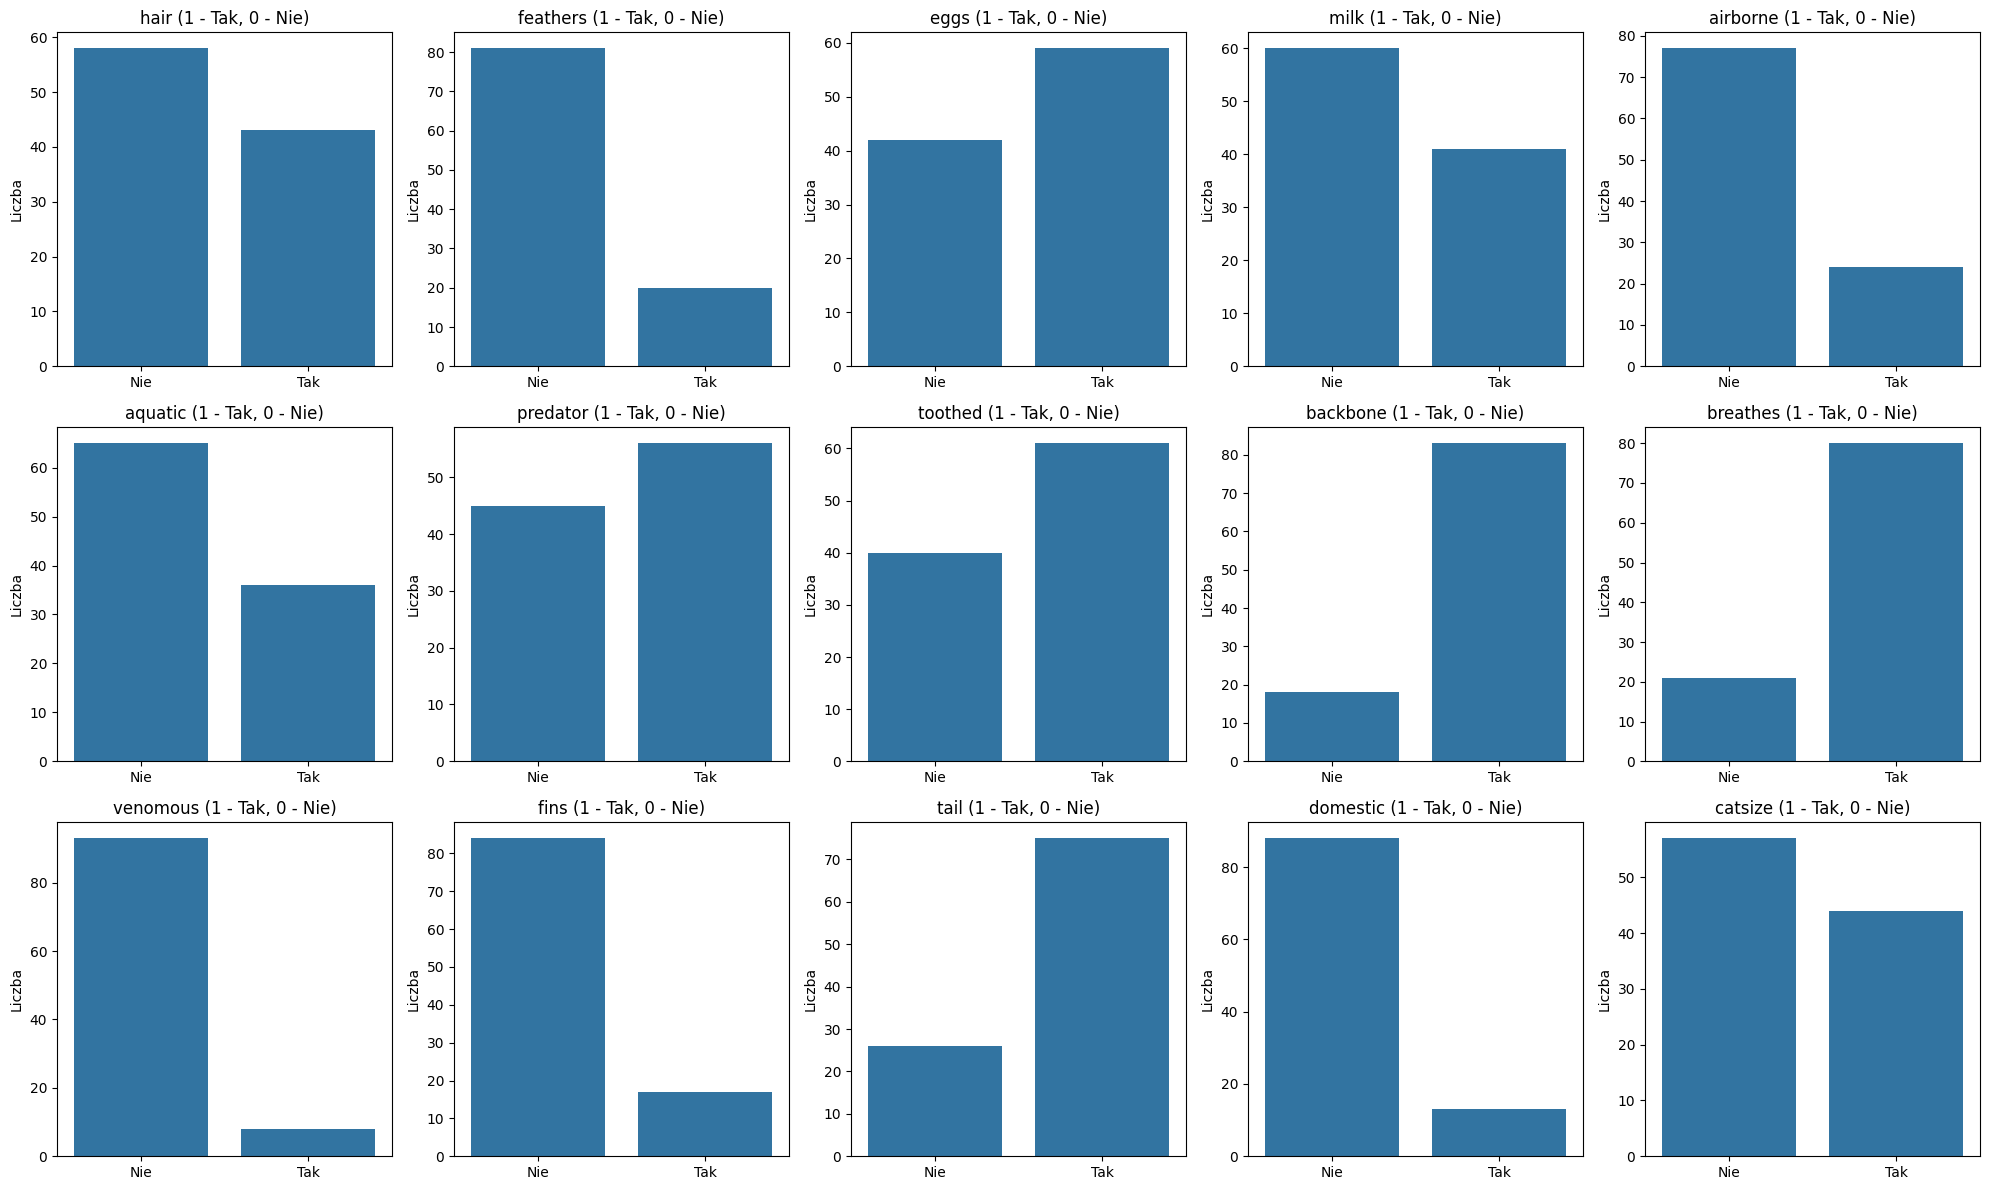

In [21]:
binary_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize']

n_cols = 5
n_rows = (len(binary_features) + n_cols - 1) // n_cols  # Zaokrąglenie w górę

plt.figure(figsize=(20, n_rows * 4))

for i, feature in enumerate(binary_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=zoo_data, x=feature)
    plt.title(f'{feature} (1 - Tak, 0 - Nie)')
    plt.xlabel('')
    plt.ylabel('Liczba')
    plt.xticks(ticks=[0, 1], labels=['Nie', 'Tak'])

plt.tight_layout()
plt.show()


# Modelowanie, ewaluacja i selekcja modelu

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Usunięcie kolumny class_type z zoo_data, ponieważ jest to nasza zmienna docelowa (etykieta), którą chcemy przewidzieć.

In [23]:
X = zoo_data.drop(['animal_name', 'class_type'], axis=1)
y = zoo_data['class_type']

Podział danych na zestaw uczący i testowy

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Standardyzacja cech

Dane są najpierw skalowane, a następnie model jest trenowany na zestawie uczącym.

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regresja logistyczna

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg_model = LogisticRegression()

log_reg_model.fit(X_train_scaled, y_train)

predictions_log_reg = log_reg_model.predict(X_test_scaled)

accuracy_log_reg = accuracy_score(y_test, predictions_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.4f}')

print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, predictions_log_reg))

print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, predictions_log_reg))


Logistic Regression Accuracy: 0.9355
Logistic Regression Confusion Matrix:
[[15  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  2]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.79      0.81      0.79        31
weighted avg       0.92      0.94      0.92        31



C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

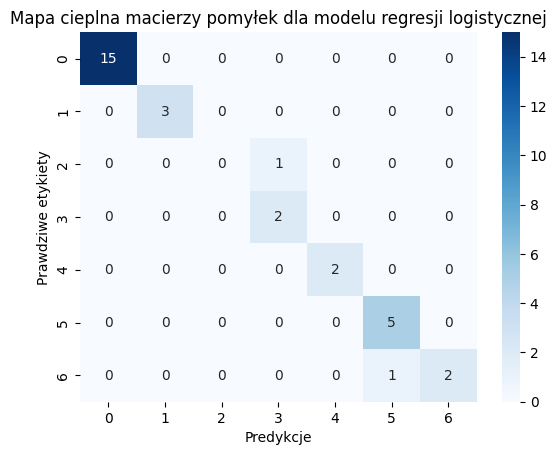

In [50]:
mat_log = confusion_matrix(y_test, predictions_log_reg)
sns.heatmap(mat_log, annot=True, fmt="d", cmap="Blues")
plt.title('Mapa cieplna macierzy pomyłek dla modelu regresji logistycznej')
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe etykiety')
plt.show()

In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, y_train)

predictions_lin_reg = lin_reg_model.predict(X_test_scaled)

predictions_lin_reg_rounded = [round(pred) for pred in predictions_lin_reg]

accuracy_lin_reg = accuracy_score(y_test, predictions_lin_reg_rounded)
print(f'Linear Regression Accuracy: {accuracy_lin_reg:.4f}')

print('Linear Regression Confusion Matrix:')
print(confusion_matrix(y_test, predictions_lin_reg_rounded))

print('\nLinear Regression Classification Report:')
print(classification_report(y_test, predictions_lin_reg_rounded))

## KNN

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

predictions_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f'KNN Accuracy: {accuracy_knn:.4f}')
print('KNN Confusion Matrix:')
print(confusion_matrix(y_test, predictions_knn))

print('\nKNN Classification Report:')
print(classification_report(y_test, predictions_knn))

KNN Accuracy: 0.9032
KNN Confusion Matrix:
[[15  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  0  0  0  2]]

KNN Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         5
           7       1.00      0.67      0.80         3

    accuracy                           0.90        31
   macro avg       0.81      0.74      0.75        31
weighted avg       0.95      0.90      0.91        31



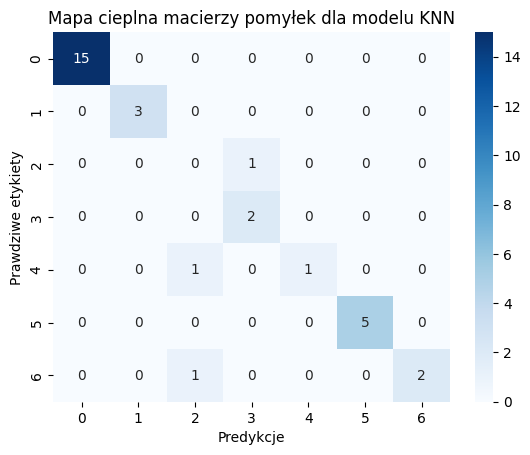

In [48]:
mat_knn = confusion_matrix(y_test, predictions_knn)
sns.heatmap(mat_knn, annot=True, fmt="d", cmap="Blues")
plt.title('Mapa cieplna macierzy pomyłek dla modelu KNN')
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe etykiety')
plt.show()

## Random Forest

In [28]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

predictions_rf = random_forest_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, predictions_rf))

print('\nRandom Forest Classification Report:')
print(classification_report(y_test, predictions_rf))

Random Forest Accuracy: 0.9355
Random Forest Confusion Matrix:
[[15  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 1  0  0  0  0  0  2]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.80      0.81      0.80        31
weighted avg       0.92      0.94      0.92        31



C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

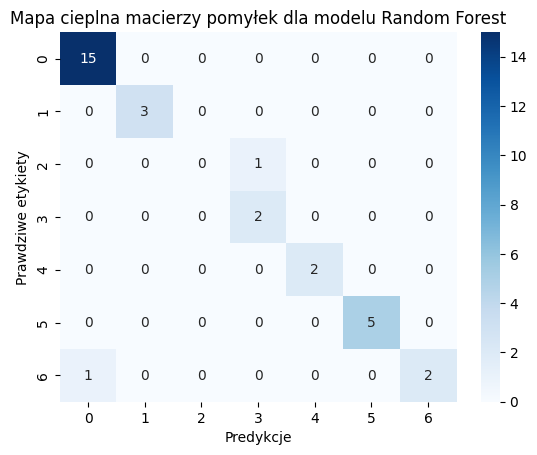

In [29]:
mat_rf = confusion_matrix(y_test, predictions_rf)
sns.heatmap(mat_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Mapa cieplna macierzy pomyłek dla modelu Random Forest')
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe etykiety')
plt.show()


In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

lin_reg_model = precision_score(y_test, predictions_lin_reg_rounded, average='macro')
recall_lin_reg = recall_score(y_test, predictions_lin_reg_rounded, average='macro')
f1_lin_reg = f1_score(y_test, predictions_lin_reg_rounded, average='macro')

precision_knn = precision_score(y_test, predictions_knn, average='macro')
recall_knn = recall_score(y_test, predictions_knn, average='macro')
f1_knn = f1_score(y_test, predictions_knn, average='macro')

precision_rf = precision_score(y_test, predictions_rf, average='macro')
recall_rf = recall_score(y_test, predictions_rf, average='macro')
f1_rf = f1_score(y_test, predictions_rf, average='macro')

scores = {
    'Regresja Logistyczna': [precision_lin_reg, recall_lin_reg, f1_lin_reg],
    'KNN': [precision_knn, recall_knn, f1_knn],
    'Random Forest': [precision_rf, recall_rf, f1_rf]
}
metrics = ['Precyzja', 'Recall', 'F1-score']


C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Porównanie modeli

C:\Users\Julia\AppData\Local\Temp\ipykernel_14328\2742833583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


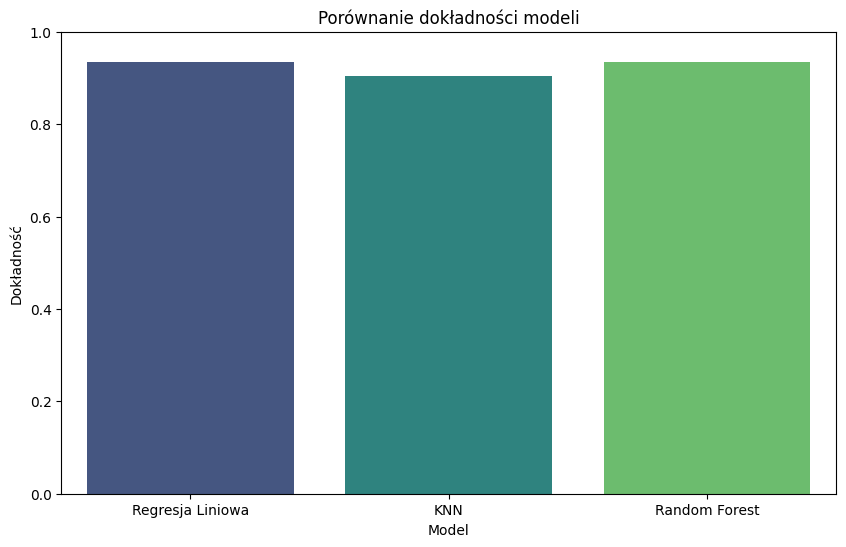

In [46]:
accuracies = [accuracy_log_reg, accuracy_knn, accuracy_rf]
model_names = ['Regresja Liniowa', 'KNN', 'Random Forest']

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Porównanie dokładności modeli')
plt.ylabel('Dokładność')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()


In [51]:
barWidth = 0.25
r = np.arange(len(metrics))
plt.figure(figsize=(12, 8))

for i, (model, scores) in enumerate(scores.items()):
    plt.bar(r + i * barWidth, scores, color=['b', 'r', 'g'][i], width=barWidth, label=model)

plt.xlabel('Metryki', fontsize=15)
plt.ylabel('Wartości', fontsize=15)
plt.xticks(r + barWidth, metrics)
plt.legend()
plt.title('Porównanie modeli')
plt.show()

AttributeError: 'list' object has no attribute 'items'

<Figure size 1200x800 with 0 Axes>

Ważność cech w modelu Random Forest: Ta wizualizacja ukazuje, które cechy miały największy wpływ na decyzje modelu. Cechy są uporządkowane od tych najważniejszych do najmniej istotnych. Pozwala to zrozumieć, na jakich atrybutach model opiera swoje predykcje i które cechy zwierząt są kluczowe dla klasyfikacji do odpowiedniej klasy.

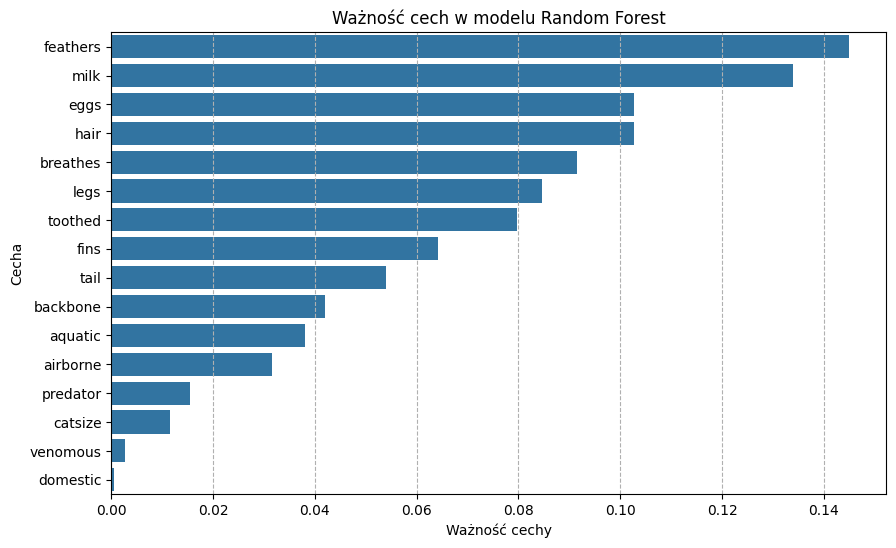

In [ ]:
# Wizualizacja ważności cech dla modelu Random Forest
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Ważność cech w modelu Random Forest')
plt.xlabel('Ważność cechy')
plt.ylabel('Cecha')
plt.grid(axis='x', linestyle='--')
plt.show()


In [37]:
new_data = [[0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 4, 1, 0, 0]]
new_data_scaled = scaler.transform(new_data)

predicted_class = log_reg_model.predict(new_data_scaled)
predicted_class_name = class_data[class_data['Class_Number'] == predicted_class[0]]['Class_Type'].values[0]

print(f'Przewidziana klasa zwierzęcia: {predicted_class[0]}, {predicted_class_name}')


Przewidziana klasa zwierzęcia: 2, Bird


C:\Users\Julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Wnioski

Regresja logistyczna i Random Forest wykazały wysoką dokładność w klasyfikacji zwierząt na podstawie ich cech

Dla tego zestawu danych złożoność modelu Random Forest nie przyniosła znaczącej poprawy

W tym przypadku wystarczy mniej złożony model, ponieważ dane są dobrze przygotowane i mają cechy, które są silnymi predyktorami
